In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'intencity_transformed_image')

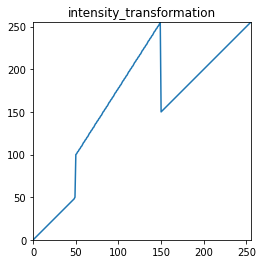

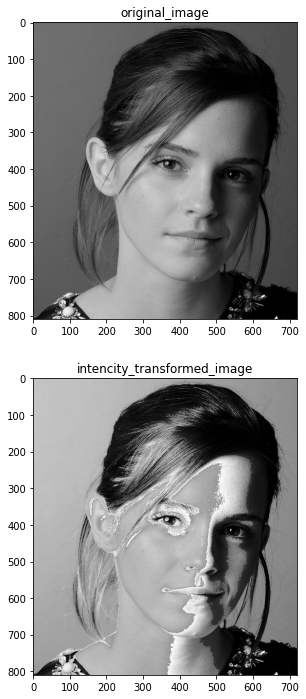

In [33]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)

assert f is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(100, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

t = np.concatenate((t1, t2, t3, t4, t5), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()
ax.plot(t)

ax.set_title('intensity_transformation')
ax.set_aspect('equal')
plt.xlim([0, 255])
plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0].imshow(f)
ax[0].set_title('original_image')
ax[1].imshow(g)
ax[1].set_title('intencity_transformed_image')


Text(0.5, 1.0, 'white matter')

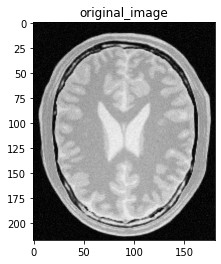

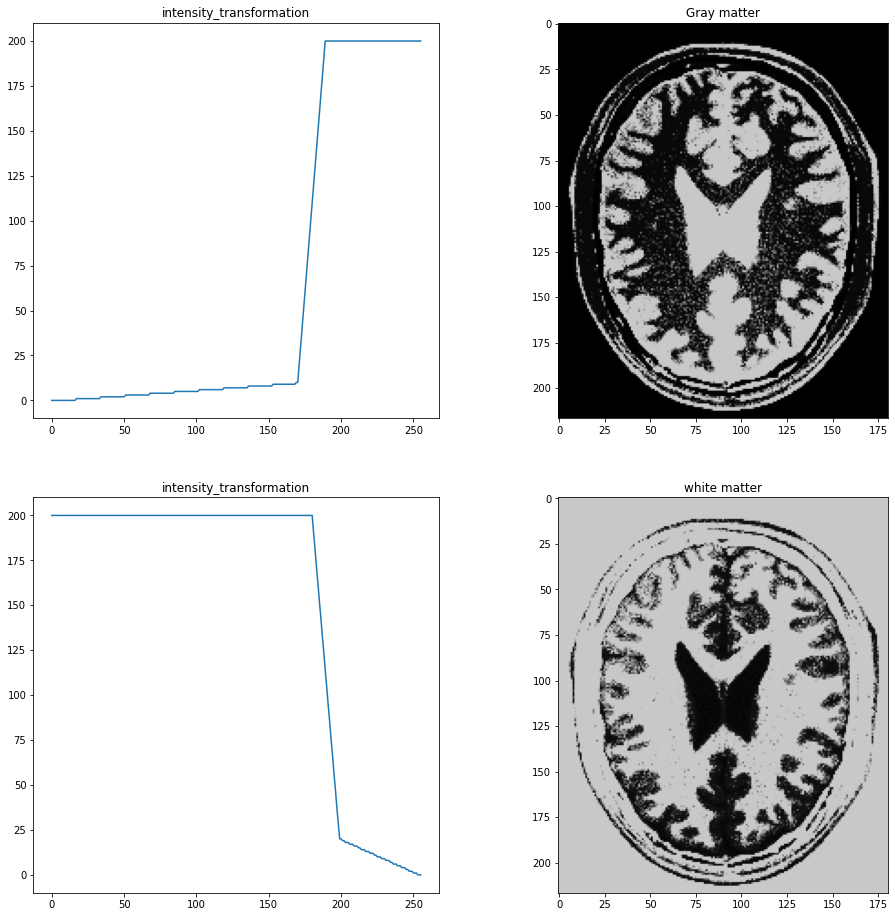

In [8]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)

assert f is not None

t1 = np.linspace(0, 10, 170)
t2 = np.linspace(10, 200, 20)
t3 = np.linspace(200, 200, 66)

t4 = np.linspace(0, 200, 0)
t5 = np.linspace(200, 200, 180)
t6 = np.linspace(200, 20, 20)
t7 = np.linspace(20, 0, 56)


t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
t_ = np.concatenate((t4, t5, t6, t7), axis = 0).astype(np.uint8)

fg, ax = plt.subplots()

ax.imshow(f)
ax.set_title('original_image')


# ax.set_title('intensity_transformation')                          #RGB colors for gray matter nearly 200, 127, 137
# ax.set_aspect('equal')
# plt.xlim([0, 255])
# plt.ylim([0, 255])

assert len(t) == 256
g = cv.LUT(f, t)
h = cv.LUT(f, t_)


g = cv.cvtColor(g, cv.COLOR_BGR2RGB)
h = cv.cvtColor(h, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# ax[0].imshow(f, cmap = 'gray', vmin=0, vmax=255)
# ax[1].imshow(g, cmap = 'gray', vmin=0, vmax=255)

ax[0][0].plot(t)
ax[0][0].set_title('intensity_transformation')

ax[0][1].imshow(g)
ax[0][1].set_title('Gray matter')

ax[1][0].plot(t_)
ax[1][0].set_title('intensity_transformation')

ax[1][1].imshow(h)
ax[1][1].set_title('white matter')




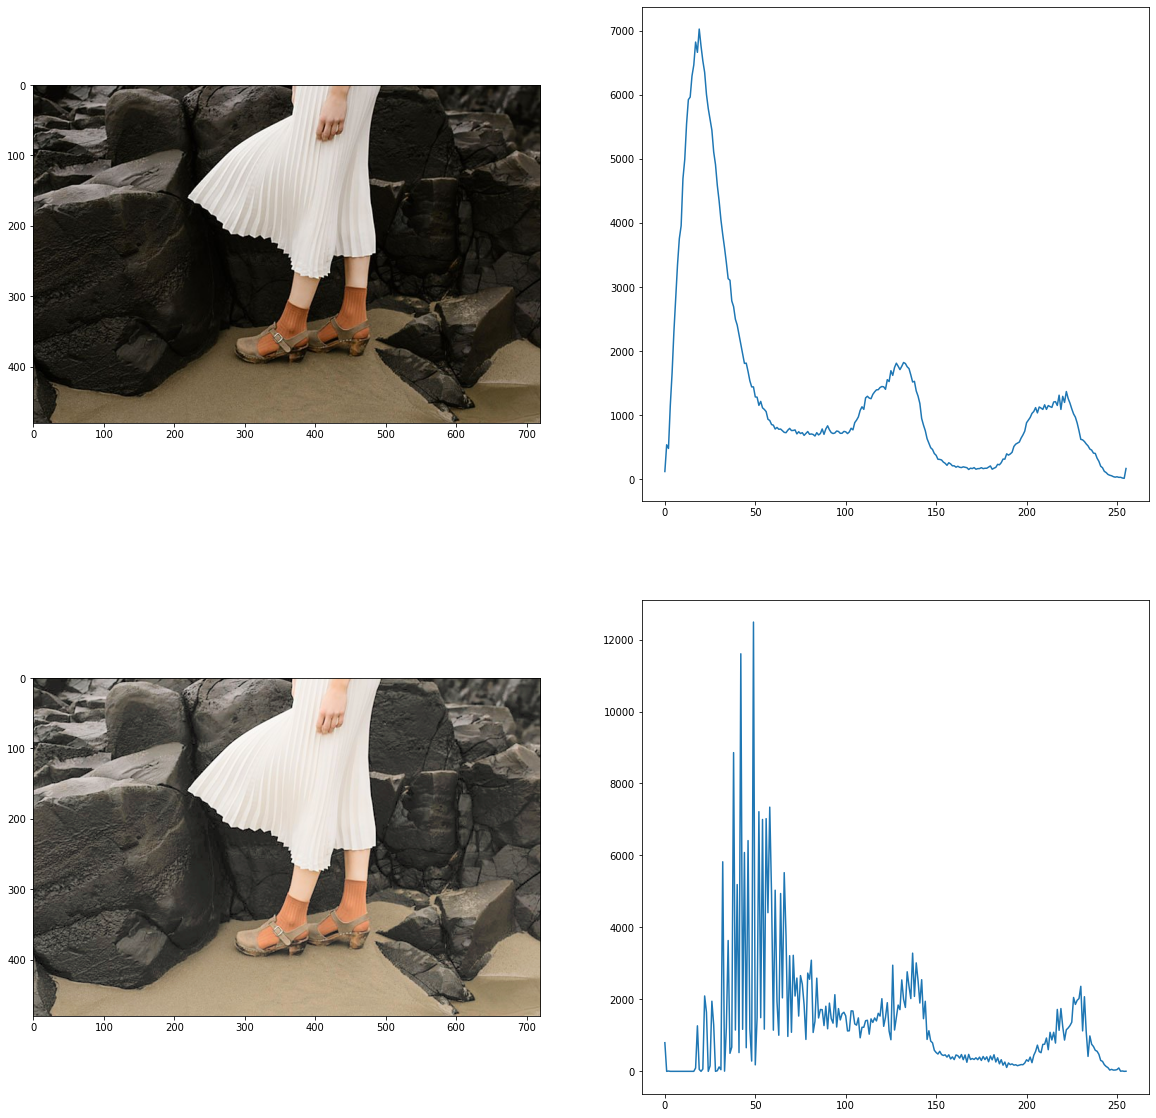

In [34]:
f = cv.imread(r'highlights_and_shadows.jpg')
assert f is not None

f1 = cv.cvtColor(f, cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(f, cv.COLOR_BGR2LAB)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)

f3 = cv.LUT(f2[:, :, 0], t)
f2[:,:, 0] = f3    
f4 = cv.cvtColor(f2, cv.COLOR_LAB2RGB)  

hist_f = cv.calcHist([f], [2], None, [256], [0, 256]) #histogram of original image
hist_f4 = cv.calcHist([f4], [2], None, [256], [0, 256]) #histogram of gamma corected image

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0][0].imshow(f1)
ax[0][1].plot(hist_f)
ax[1][0].imshow(f4)
ax[1][1].plot(hist_f4)

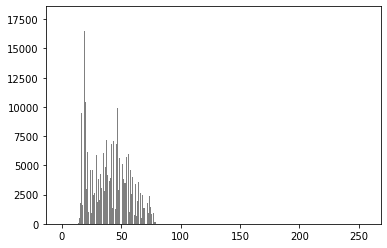

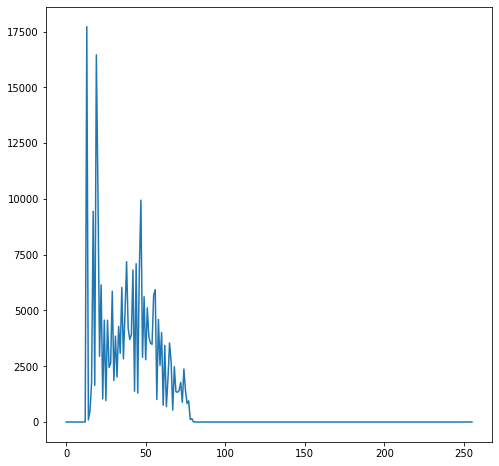

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r"shells.png", cv.IMREAD_GRAYSCALE)
def my_hist(img):
    1

def manHist(img):
   row, col = img.shape # img is a grayscale image
   y = np.zeros((256), np.uint64)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x,y,color="gray",align="center")
   plt.show()
manHist(img)

hist_img = cv.calcHist([img], [0], None, [256], [0, 256])

fg, ax = plt.subplots( figsize=(8, 8))

ax.plot(hist_img)
    


(600, 960, 3)


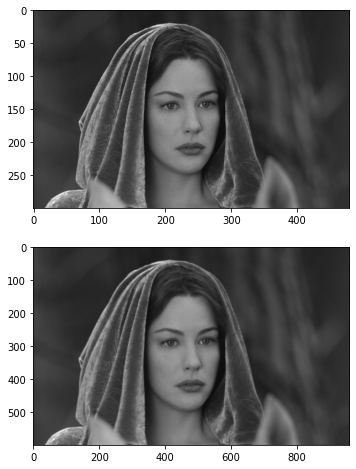

In [22]:
img = cv.imread(r"a1q5images/im02small.png", cv.IMREAD_GRAYSCALE)

height, width = img.shape
img_bgr2rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

factor =2
img_resize = cv.resize(img_bgr2rgb, (width * factor, height * factor ), 0, 0, cv.INTER_NEAREST)
print(img_resize.shape)

fig, ax = plt.subplots(2,1 , figsize=(8, 8))
ax[0].imshow(img_bgr2rgb)
ax[1].imshow(img_resize)


plt.show()

(300, 480)


C:\Users\traja\AppData\Local\Temp\ipykernel_11160\2861936739.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
  ssd+= (im[row][col]-zoomed[row][col])**2
C:\Users\traja\AppData\Local\Temp\ipykernel_11160\2861936739.py:17: RuntimeWarning: overflow encountered in int_scalars
  ssd+= (im[row][col]-zoomed[row][col])**2


-1440660397


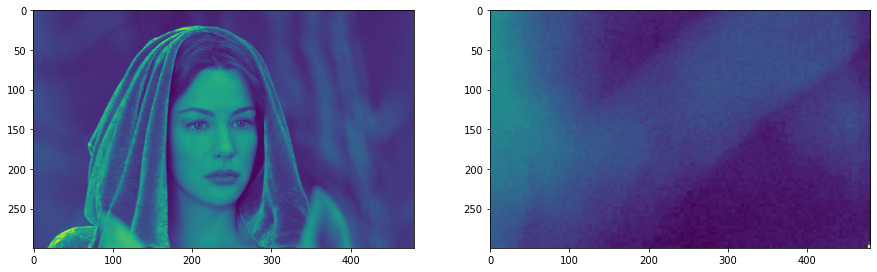

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"a1q5images/im02small.png", cv.IMREAD_GRAYSCALE)
assert im is not None

print(im.shape)

s = 4
ssd = 0
zoomed = np.zeros(im.shape, dtype=im.dtype)

for row in range(im.shape[0]):
    for col in range(im.shape[1]):
        zoomed[row][col] = im[int(row/s)][int(col/s)]
        ssd+= (im[row][col]-zoomed[row][col])**2


# for row in range(im.shape[0]):
#     for col in range(im.shape[1]):
#         ssd+= (im[row][col]-zoomed[row][col])**2
print(ssd)
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(im)
ax[1].imshow(zoomed)


(190, 182)


error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


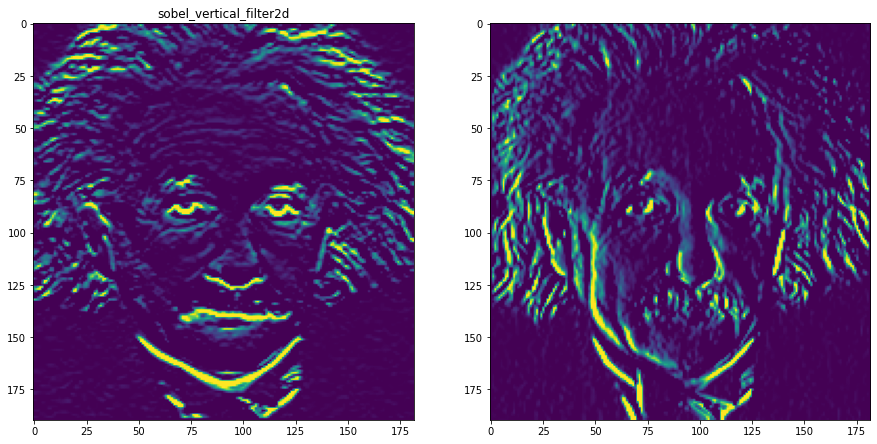

In [86]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r"einstein.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
# im = cv.cvtColor(im, cv.COLOR_GRAY2BGR)
# im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(im.shape)
assert im is not None

def sobel(im, kernal):
    row, col = im.shape
    filtered_im = np.zeros((im.shape))
    for i in range(0 + 1, row-1):
        for j in range(0 + 1, col-1):
            # im[i-1][j-1]*kernal[0][0]
            # im[i-1][j]*kernal[0][1]
            # im[i-1][j+1]*kernal[0][2]
            av = 0
            for ki in [0, 1, 2]:
                for kj in [0, 1, 2]:
                    av+= im[i - 1 + ki][j - 1 + kj]*kernal[ki][kj]
                    # print(i, j, ki, kj)
            av = av/9
            filtered_im[i][j] = av
    return filtered_im

sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobelv_im = cv.filter2D(im, -1, sobel_v)
sobelh_im = cv.filter2D(im, -1, sobel_h)
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(sobelv_im)
ax[0].set_title("sobel_vertical_filter2d")
ax[1].imshow(sobelh_im)
# ax[1].set_title("sobel_horizontal_filter2d")
# im = np.array([[1, 2, 3, 4], [1, 8, 3, 4], [1, 2, 3, 4]])

filtered_imv = sobel(im, sobel_v)
filtered_imh = sobel(im, sobel_h)

# filtered_imv = cv.cvtColor(filtered_imv, cv.COLOR_GRAY2RGB)
# filtered_imh = cv.cvtColor(filtered_imh, cv.COLOR_GRAY2RGB)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(filtered_imv)
ax[0].set_title("sobel_vertical")
ax[1].imshow(filtered_imh)
ax[1].set_title("sobel_horizontal")